In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('./empatheticdialogues/valid.csv',on_bad_lines='skip')
df

,conv_id,utterance_idx,context,prompt,speaker_idx,utterance,selfeval,tags
0,hit:3_conv:6,1,terrified,Today_comma_as i was leaving for work in the m...,6,Today_comma_as i was leaving for work in the m...,4|5|5_5|5|5,NaN
1,hit:3_conv:6,3,terrified,Today_comma_as i was leaving for work in the m...,6,Yeah_comma_i'm doing alright now_comma_ but wi...,4|5|5_5|5|5,NaN
2,hit:3_conv:6,5,terrified,Today_comma_as i was leaving for work in the m...,6,The car was badly damaged_comma_i veered outsi...,4|5|5_5|5|5,NaN
3,hit:4_conv:9,1,surprised,I was walking through my hallway a few week ag...,8,A few weeks ago_comma_ I was walking through m...,5|5|5_3|5|5,NaN
4,hit:4_conv:9,3,surprised,I was walking through my hallway a few week ag...,8,I may have let out a scream that will have him...,5|5|5_3|5|5,NaN
...,...,...,...,...,...,...,...,...
6313,hit:12350_conv:24701,5,prepared,When I went into labor with my son_comma_ it w...,791,In the end_comma_ yes--growing too big is actu...,5|5|5_5|5|5,NaN
6314,hit:12361_conv:24722,1,prepared,One time I studied all night for my final exam!,547,One time I studied all night for my final exam!,4|4|5_4|4|3,NaN
6315,hit:12361_conv:24722,3,prepared,One time I studied all night for my final exam!,547,It was for Organic Chemistry,4|4|5_4|4|3,NaN
6316,hit:12392_conv:24785,1,furious,One of my coworkers has been arguing with his ...,791,One of my coworkers has been arguing with his ...,4|5|5_5|5|5,NaN


In [16]:
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Baixar stopwords
nltk.download('stopwords')

# Step 1: Limpeza dos dados

# Função para normalizar o texto
def clean_text(text):
    text = text.lower()  # converter para minúsculas
    text = re.sub(r'[^\w\s]', '', text)  # remover pontuações
    text = re.sub(r'\d+', '', text)  # remover números
    return text

# Remover stopwords
stop_words = set(stopwords.words('english'))

# Remover stopwords com tokenização simples (split)
def remove_stopwords(text):
    words = text.split()  # Tokenização simples
    words = [word for word in words if word not in stop_words]  # Remoção de stopwords
    return ' '.join(words)

# Aplicar stemming
ps = PorterStemmer()

def apply_stemming(text):
    words = text.split()  # Tokenização simples
    words = [ps.stem(word) for word in words]  # Stemming
    return ' '.join(words)

# Aplicar a limpeza no dataset
df['prompt_clean'] = df['prompt'].apply(lambda x: apply_stemming(remove_stopwords(clean_text(str(x)))))
df['utterance_clean'] = df['utterance'].apply(lambda x: apply_stemming(remove_stopwords(clean_text(str(x)))))

# Step 2: Download and load the pre-trained GloVe embeddings
glove_file_path = 'glove.6B.300d.txt'

def load_glove_model(file_path):
    glove_model = {}
    with open(file_path, 'r', encoding="utf-8") as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            glove_model[word] = embedding
    return glove_model

# Carregar o modelo GloVe
try:
    glove_model = load_glove_model(glove_file_path)
except FileNotFoundError:
    glove_model = None  # Em caso de erro, isso pode ser simulado com embeddings aleatórios

# Step 3: Função para criar embeddings a partir das frases limpas
def sentence_to_glove_embedding(sentence, glove_model, embedding_dim=300):
    if glove_model is None:
        # Simula embeddings aleatórios para ambiente sem o GloVe disponível
        return np.random.rand(embedding_dim)
    
    words = sentence.split()  # Tokenização simples para embeddings
    valid_embeddings = [glove_model[word] for word in words if word in glove_model]
    if len(valid_embeddings) > 0:
        return np.mean(valid_embeddings, axis=0)
    else:
        return np.zeros(embedding_dim)

embedding_dim = 50

# Step 4: Criar embeddings para 'prompt_clean' e 'utterance_clean'
df['prompt_embedding'] = df['prompt_clean'].apply(lambda x: sentence_to_glove_embedding(str(x), glove_model, embedding_dim))
df['utterance_embedding'] = df['utterance_clean'].apply(lambda x: sentence_to_glove_embedding(str(x), glove_model, embedding_dim))

# Visualizar o dataframe atualizado com as colunas de embeddings
df.head()


[nltk_data] Downloading package stopwords to /home/fael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,conv_id,utterance_idx,context,prompt,speaker_idx,utterance,selfeval,tags,prompt_clean,utterance_clean,prompt_embedding,utterance_embedding
0,hit:3_conv:6,1,terrified,Today_comma_as i was leaving for work in the m...,6,Today_comma_as i was leaving for work in the m...,4|5|5_5|5|5,NaN,today_comma_a leav work morning_comma_i tire b...,today_comma_a leav work morning_comma_i tire b...,"[0.333173, 0.11305428571428576, -0.13610714285...","[0.333173, 0.11305428571428576, -0.13610714285..."
1,hit:3_conv:6,3,terrified,Today_comma_as i was leaving for work in the m...,6,Yeah_comma_i'm doing alright now_comma_ but wi...,4|5|5_5|5|5,NaN,today_comma_a leav work morning_comma_i tire b...,yeah_comma_im alright now_comma_ minor injuri,"[0.333173, 0.11305428571428576, -0.13610714285...","[0.155967, 0.042347499999999996, -0.0886515, 0..."
2,hit:3_conv:6,5,terrified,Today_comma_as i was leaving for work in the m...,6,The car was badly damaged_comma_i veered outsi...,4|5|5_5|5|5,NaN,today_comma_a leav work morning_comma_i tire b...,car badli damaged_comma_i veer outsid road hit...,"[0.333173, 0.11305428571428576, -0.13610714285...","[-0.15459752999999998, -0.09093180000000001, -..."
3,hit:4_conv:9,1,surprised,I was walking through my hallway a few week ag...,8,A few weeks ago_comma_ I was walking through m...,5|5|5_3|5|5,NaN,walk hallway week ago_comma_ son hide tabl gra...,week ago_comma_ walk hallway_comma_ mind busin...,"[-0.062985375, -0.010565125000000002, -0.18357...","[-0.030938363636363632, -0.029615545454545453,..."
4,hit:4_conv:9,3,surprised,I was walking through my hallway a few week ag...,8,I may have let out a scream that will have him...,5|5|5_3|5|5,NaN,walk hallway week ago_comma_ son hide tabl gra...,may let scream question manhood rest lives_com...,"[-0.062985375, -0.010565125000000002, -0.18357...","[-0.019845999999999992, 0.04836498571428571, 0..."


In [17]:
# Verificar a coluna 'tags' para entender melhor seu conteúdo
tags_info = df['tags'].isna().value_counts()

# Exibir o resultado
tags_info


tags
True     6273
False      45
Name: count, dtype: int64

DEcidir entre remover ou manter a coluna tags, não encontrei no artigo o autor descrevendo esse campo ou tratando ele de alguma forma. Talvez seja possivel gerar as tags com alguma lógica, mas teria que ter isso documentado por quem criou o dataset

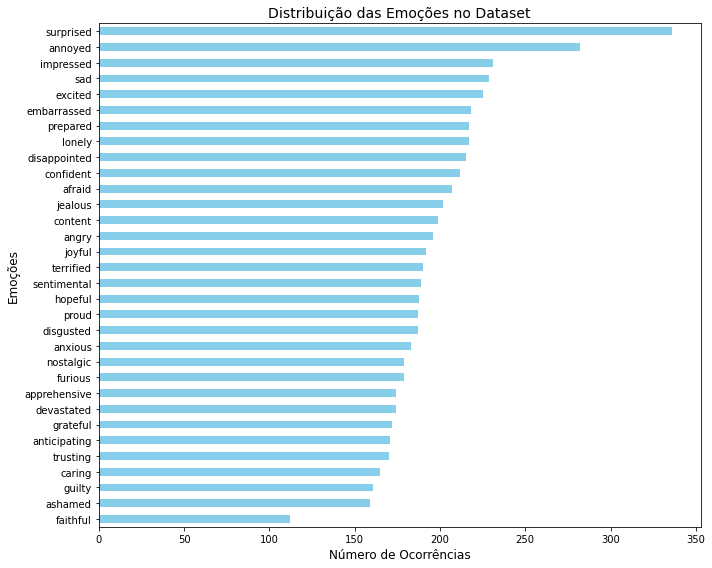

In [18]:
import matplotlib.pyplot as plt

context_distribution = df['context'].value_counts()

# Criar o gráfico de barras horizontal para a distribuição das emoções
plt.figure(figsize=(10, 8))
context_distribution.sort_values().plot(kind='barh', color='skyblue')

plt.title('Distribuição das Emoções no Dataset', fontsize=14)
plt.xlabel('Número de Ocorrências', fontsize=12)
plt.ylabel('Emoções', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [19]:
# Verificar a existência de valores ausentes em todas as colunas do dataset
missing_values = df.isna().sum()

# Exibir o número de valores ausentes por coluna
missing_values


conv_id                   0
utterance_idx             0
context                   0
prompt                    0
speaker_idx               0
utterance                 0
selfeval                  5
tags                   6273
prompt_clean              0
utterance_clean           0
prompt_embedding          0
utterance_embedding       0
dtype: int64

In [20]:
# Remover as colunas 'selfeval' e 'tags' do dataset
df.drop(columns=['selfeval', 'tags'], inplace=True)

# Verificar o dataframe atualizado
df.head()


,conv_id,utterance_idx,context,prompt,speaker_idx,utterance,prompt_clean,utterance_clean,prompt_embedding,utterance_embedding
0,hit:3_conv:6,1,terrified,Today_comma_as i was leaving for work in the m...,6,Today_comma_as i was leaving for work in the m...,today_comma_a leav work morning_comma_i tire b...,today_comma_a leav work morning_comma_i tire b...,"[0.333173, 0.11305428571428576, -0.13610714285...","[0.333173, 0.11305428571428576, -0.13610714285..."
1,hit:3_conv:6,3,terrified,Today_comma_as i was leaving for work in the m...,6,Yeah_comma_i'm doing alright now_comma_ but wi...,today_comma_a leav work morning_comma_i tire b...,yeah_comma_im alright now_comma_ minor injuri,"[0.333173, 0.11305428571428576, -0.13610714285...","[0.155967, 0.042347499999999996, -0.0886515, 0..."
2,hit:3_conv:6,5,terrified,Today_comma_as i was leaving for work in the m...,6,The car was badly damaged_comma_i veered outsi...,today_comma_a leav work morning_comma_i tire b...,car badli damaged_comma_i veer outsid road hit...,"[0.333173, 0.11305428571428576, -0.13610714285...","[-0.15459752999999998, -0.09093180000000001, -..."
3,hit:4_conv:9,1,surprised,I was walking through my hallway a few week ag...,8,A few weeks ago_comma_ I was walking through m...,walk hallway week ago_comma_ son hide tabl gra...,week ago_comma_ walk hallway_comma_ mind busin...,"[-0.062985375, -0.010565125000000002, -0.18357...","[-0.030938363636363632, -0.029615545454545453,..."
4,hit:4_conv:9,3,surprised,I was walking through my hallway a few week ag...,8,I may have let out a scream that will have him...,walk hallway week ago_comma_ son hide tabl gra...,may let scream question manhood rest lives_com...,"[-0.062985375, -0.010565125000000002, -0.18357...","[-0.019845999999999992, 0.04836498571428571, 0..."


In [8]:
df.drop(columns=['prompt', 'utterance'], inplace=True)
df

,conv_id,utterance_idx,context,speaker_idx,prompt_clean,utterance_clean,prompt_embedding,utterance_embedding
0,hit:3_conv:6,1,terrified,6,today_comma_a leav work morning_comma_i tire b...,today_comma_a leav work morning_comma_i tire b...,"[0.333173, 0.11305428571428576, -0.13610714285...","[0.333173, 0.11305428571428576, -0.13610714285..."
1,hit:3_conv:6,3,terrified,6,today_comma_a leav work morning_comma_i tire b...,yeah_comma_im alright now_comma_ minor injuri,"[0.333173, 0.11305428571428576, -0.13610714285...","[0.155967, 0.042347499999999996, -0.0886515, 0..."
2,hit:3_conv:6,5,terrified,6,today_comma_a leav work morning_comma_i tire b...,car badli damaged_comma_i veer outsid road hit...,"[0.333173, 0.11305428571428576, -0.13610714285...","[-0.15459752999999998, -0.09093180000000001, -..."
3,hit:4_conv:9,1,surprised,8,walk hallway week ago_comma_ son hide tabl gra...,week ago_comma_ walk hallway_comma_ mind busin...,"[-0.062985375, -0.010565125000000002, -0.18357...","[-0.030938363636363632, -0.029615545454545453,..."
4,hit:4_conv:9,3,surprised,8,walk hallway week ago_comma_ son hide tabl gra...,may let scream question manhood rest lives_com...,"[-0.062985375, -0.010565125000000002, -0.18357...","[-0.019845999999999992, 0.04836498571428571, 0..."
...,...,...,...,...,...,...,...,...
6313,hit:12350_conv:24701,5,prepared,791,went labor son_comma_ quit ordeal come way ear...,end_comma_ yesgrow big actual problem,"[-0.048707299999999995, 0.021356009999999995, ...","[-0.011952666666666686, 0.38176000000000004, 0..."
6314,hit:12361_conv:24722,1,prepared,547,one time studi night final exam,one time studi night final exam,"[-0.1664183333333333, 0.19412850000000004, 0.1...","[-0.1664183333333333, 0.19412850000000004, 0.1..."
6315,hit:12361_conv:24722,3,prepared,547,one time studi night final exam,organ chemistri,"[-0.1664183333333333, 0.19412850000000004, 0.1...","[-0.21095, 0.14688, -0.5579, -0.54762, -0.0914..."
6316,hit:12392_conv:24785,1,furious,791,one cowork argu supervisor frequent despit thi...,one cowork argu supervisor lot late,"[-0.09742866666666665, 0.020563583333333326, -...","[-0.131085, 0.009351499999999999, -0.295837500..."


In [9]:
df.drop(columns=['conv_id', 'utterance_idx', 'speaker_idx'], inplace=True)
df.head()


,context,prompt_clean,utterance_clean,prompt_embedding,utterance_embedding
0,terrified,today_comma_a leav work morning_comma_i tire b...,today_comma_a leav work morning_comma_i tire b...,"[0.333173, 0.11305428571428576, -0.13610714285...","[0.333173, 0.11305428571428576, -0.13610714285..."
1,terrified,today_comma_a leav work morning_comma_i tire b...,yeah_comma_im alright now_comma_ minor injuri,"[0.333173, 0.11305428571428576, -0.13610714285...","[0.155967, 0.042347499999999996, -0.0886515, 0..."
2,terrified,today_comma_a leav work morning_comma_i tire b...,car badli damaged_comma_i veer outsid road hit...,"[0.333173, 0.11305428571428576, -0.13610714285...","[-0.15459752999999998, -0.09093180000000001, -..."
3,surprised,walk hallway week ago_comma_ son hide tabl gra...,week ago_comma_ walk hallway_comma_ mind busin...,"[-0.062985375, -0.010565125000000002, -0.18357...","[-0.030938363636363632, -0.029615545454545453,..."
4,surprised,walk hallway week ago_comma_ son hide tabl gra...,may let scream question manhood rest lives_com...,"[-0.062985375, -0.010565125000000002, -0.18357...","[-0.019845999999999992, 0.04836498571428571, 0..."


In [21]:
df.drop(columns=['prompt_clean', 'utterance_clean'], inplace=True)
df.head()

,conv_id,utterance_idx,context,prompt,speaker_idx,utterance,prompt_embedding,utterance_embedding
0,hit:3_conv:6,1,terrified,Today_comma_as i was leaving for work in the m...,6,Today_comma_as i was leaving for work in the m...,"[0.333173, 0.11305428571428576, -0.13610714285...","[0.333173, 0.11305428571428576, -0.13610714285..."
1,hit:3_conv:6,3,terrified,Today_comma_as i was leaving for work in the m...,6,Yeah_comma_i'm doing alright now_comma_ but wi...,"[0.333173, 0.11305428571428576, -0.13610714285...","[0.155967, 0.042347499999999996, -0.0886515, 0..."
2,hit:3_conv:6,5,terrified,Today_comma_as i was leaving for work in the m...,6,The car was badly damaged_comma_i veered outsi...,"[0.333173, 0.11305428571428576, -0.13610714285...","[-0.15459752999999998, -0.09093180000000001, -..."
3,hit:4_conv:9,1,surprised,I was walking through my hallway a few week ag...,8,A few weeks ago_comma_ I was walking through m...,"[-0.062985375, -0.010565125000000002, -0.18357...","[-0.030938363636363632, -0.029615545454545453,..."
4,hit:4_conv:9,3,surprised,I was walking through my hallway a few week ag...,8,I may have let out a scream that will have him...,"[-0.062985375, -0.010565125000000002, -0.18357...","[-0.019845999999999992, 0.04836498571428571, 0..."


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Função para padronizar o tamanho dos embeddings
def pad_or_truncate(embedding, target_length):
    embedding = np.array(embedding)  # Certificar que o embedding é um array numpy
    if len(embedding) > target_length:
        # Truncar se o embedding for maior que o target_length
        return embedding[:target_length]
    elif len(embedding) < target_length:
        # Preencher com zeros se o embedding for menor que o target_length
        return np.pad(embedding, (0, target_length - len(embedding)), 'constant')
    return embedding

# Verificar os tamanhos dos embeddings de prompt e utterance
df['prompt_embedding_size'] = df['prompt_embedding'].apply(len)
df['utterance_embedding_size'] = df['utterance_embedding'].apply(len)

# Exibir o tamanho mínimo e máximo dos embeddings
print("Tamanho dos embeddings de 'prompt':", df['prompt_embedding_size'].min(), df['prompt_embedding_size'].max())
print("Tamanho dos embeddings de 'utterance':", df['utterance_embedding_size'].min(), df['utterance_embedding_size'].max())

# Definir o comprimento máximo
max_length = max(df['prompt_embedding'].apply(len).max(), df['utterance_embedding'].apply(len).max())

# Aplicar padding ou truncamento nos embeddings
df['prompt_embedding'] = df['prompt_embedding'].apply(lambda x: pad_or_truncate(x, max_length))
df['utterance_embedding'] = df['utterance_embedding'].apply(lambda x: pad_or_truncate(x, max_length))

# Combinar os embeddings
df['combined_embedding'] = df.apply(lambda row: list(row['prompt_embedding']) + list(row['utterance_embedding']), axis=1)

# Transformar os embeddings combinados em uma matriz numpy
X = np.vstack(df['combined_embedding'].values)

# Normalizar os embeddings
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Definir as classes como Y
Y = df['context']

# Dividir entre treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)


Tamanho dos embeddings de 'prompt': 50 300
Tamanho dos embeddings de 'utterance': 50 300


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=10000)
model.fit(X_train, Y_train)

# Fazer previsões
Y_pred = model.predict(X_test)

# Exibir o relatório de classificação
print(classification_report(Y_test, Y_pred))

# Exibir os coeficientes (importância das features) por classe
feature_importances = model.coef_

# Exibir as features mais influentes para cada classe (emoção)
for idx, emotion in enumerate(model.classes_):
    print(f"Features mais influentes para {emotion}:")
    top_features = np.argsort(np.abs(feature_importances[idx]))[::-1][:10]  # Top 10 features
    print(top_features)

              precision    recall  f1-score   support

      afraid       0.42      0.46      0.44        48
       angry       0.29      0.22      0.25        45
     annoyed       0.29      0.29      0.29        41
anticipating       0.38      0.30      0.33        30
     anxious       0.21      0.30      0.25        30
apprehensive       0.27      0.26      0.27        34
     ashamed       0.44      0.40      0.42        30
      caring       0.48      0.47      0.48        34
   confident       0.50      0.43      0.46        49
     content       0.50      0.35      0.41        43
  devastated       0.36      0.40      0.38        40
disappointed       0.26      0.26      0.26        34
   disgusted       0.79      0.59      0.68        46
 embarrassed       0.71      0.59      0.64        58
     excited       0.29      0.38      0.33        39
    faithful       0.25      0.41      0.31        17
     furious       0.17      0.21      0.19        34
    grateful       0.62    

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir o modelo
rf = RandomForestClassifier()

# Definir os hiperparâmetros a serem otimizados e suas distribuições
param_dist = {
    'n_estimators': randint(100, 500),  # Número de árvores na floresta
    'max_depth': randint(10, 50),       # Profundidade máxima da árvore
    'min_samples_split': randint(2, 10),  # Mínimo de amostras para dividir um nó
    'min_samples_leaf': randint(1, 10),   # Mínimo de amostras por folha
    'bootstrap': [True, False],           # Usar ou não o bootstrapping
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, 
    n_iter=50,  # Número de combinações aleatórias a serem testadas
    scoring='accuracy',  # Métrica de avaliação
    cv=3,  # Validação cruzada com 3 folds
    verbose=2,  # Exibir mais detalhes durante a execução
    random_state=42,
    n_jobs=-1  # Usar todos os núcleos disponíveis
)

# Treinar a busca aleatória com os dados balanceados
random_search.fit(X_train_balanced, Y_train_balanced)

# Exibir os melhores parâmetros
print("Melhores parâmetros encontrados: ", random_search.best_params_)

# Avaliar o desempenho no conjunto de teste
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(Y_test, y_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Definir o modelo XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(df['context'].unique()))

# Definir os hiperparâmetros a serem otimizados
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'colsample_bytree': uniform(0.3, 0.7),
    'subsample': uniform(0.5, 0.9),
    'gamma': uniform(0, 0.5)
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist,
    n_iter=50, scoring='accuracy', cv=3,
    verbose=2, random_state=42, n_jobs=-1
)

# Treinar o modelo com a busca aleatória
random_search.fit(X_train_balanced, Y_train_balanced)

# Exibir os melhores parâmetros
print("Melhores parâmetros encontrados: ", random_search.best_params_)

# Avaliar o desempenho no conjunto de teste
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)
print(classification_report(Y_test, y_pred))


In [ ]:
from tqdm import tqdm

# Redefinir o tqdm para não exibir a barra de progresso
tqdm.__init__ = lambda *args, **kwargs: None

from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Dividir os dados entre treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)

# Configurar o TPOT para otimização genética, com menos verbosidade e sem barra de progresso
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42, n_jobs=2)

# Treinar o TPOT para encontrar o melhor modelo e hiperparâmetros
tpot.fit(X_train, Y_train)

# Avaliar o desempenho no conjunto de teste
y_pred = tpot.predict(X_test)
print("Acurácia no conjunto de teste:", tpot.score(X_test, Y_test))
print(classification_report(Y_test, y_pred))

# Exportar o melhor pipeline encontrado
tpot.export('best_pipeline.py')


In [ ]:

# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Step 1: Prepare the data for GRU
X = np.array(df['prompt_embedding'].tolist())  # Using prompt embeddings for classification
y = df['selfeval'].str.split('_').str[0]  # Using the first part of 'selfeval' as the label

# Encode the labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Step 2: Build the GRU model
model = Sequential()
model.add(GRU(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the input to be compatible with GRU
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

# Step 3: Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Step 4: Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Accuracy with GRU: {accuracy * 100:.2f}%")


In [ ]:

# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Step 1: Prepare the data for SMOTE and GRU
X = np.array(df['prompt_embedding'].tolist())  # Using prompt embeddings for classification
y = df['selfeval'].str.split('_').str[0]  # Using the first part of 'selfeval' as the label

# Encode the labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Build the GRU model
model = Sequential()
model.add(GRU(128, input_shape=(X_train_resampled.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train_resampled.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the input to be compatible with GRU
X_train_resampled_reshaped = np.expand_dims(X_train_resampled, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

# Step 4: Train the model
history = model.fit(X_train_resampled_reshaped, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Accuracy with GRU after SMOTE: {accuracy * 100:.2f}%")
